## Sin activar mecanismo de disparo
$$
\frac{d V_m(t)}{dt} = \frac{1}{\tau_m}(E_L-V_m(t)+R_m I_e(t))
$$


In [1]:
tau_m = 10 #Tiempo caracteristico de la membrana.
E_l = -65 # Potencial de reposo.
R_m = 10 #Resistencia.
# I_e es una corrien te externa.

## A) Caso $I_e$ = 0

$$
\frac{d V_m(t)}{dt} = \frac{1}{\tau_m}(E_L-V_m(t))
$$

Importo todo y defino rk4 y el integrador

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math as mt

In [3]:
def rk4(f,x,t,dt,p):
    """
    Calcula un paso de integración del método de Runge Kutta orden 4.
    
    Argumentos de entrada:
    
        f : R^n -> R^n
        x = x(t) : R^n
        t = tiempo : R
        dt = paso de tiempo : R
        p = parametros : R^q        
        
    Retorna aproximacion numérica de
    
        x(t+dt) : R^n

    # Ejemplos:
    """    
    k1 = f(x,t,p)
    k2 = f(x+0.5*dt*k1,t+0.5*dt,p)
    k3 = f(x+0.5*dt*k2,t+0.5*dt,p)
    k4 = f(x+dt*k3,t+dt,p)
    return x+dt*(k1+2.0*k2+2.0*k3+k4)/6.0

In [4]:
def integrador_ode(m,f,x0,a,b,k,p):
    """
    Integra numéricamente la ODE
    
        dx/dt = f(x,t)
        
    sobre el intervalo t:[a,b] usando k pasos de integración y el método m, bajo condicion inicial x(a)=x0.
    No es necesario que a<b.
    
    Argumentos de entrada:
    
        m = metodo de integracion (ej. euler, rk2, etc.)
        f : R^n -> R^n
        x0 = condicion inicial : R
        a = tiempo inicial : R
        b = tiempo final : R
        k = num. pasos de integracion : N
        p = parametros : R^q        
    
    Retorna:
    
        t : R^{k+1} , t_j = a+j*dt para j=0,1,...,k
        x : R^{k+1,n} , x_ij = x_i(t_j) para i=0,1,...,n-1 y j=0,1,...,k
        
    donde a+k*dt = b.
    """  
    assert k>0
    n = len(x0)
    dt = (b-a)/k
    x = np.zeros((n,k+1))
    t = np.zeros(k+1)
    x[:,0] = x0
    t[0] = a
    for j in range(k):
        t[j+1] = t[j] + dt
        x[:,j+1] = m(f,x[:,j],t[j],dt,p)
    return t,x

$$
\frac{d V_m(t)}{dt} = \frac{1}{\tau_m}(E_L-V_m(t))
$$

In [5]:
def v_prima(v):
    return (-65-v)/10
def v_prima_I(v):
    return (-45-v)/10

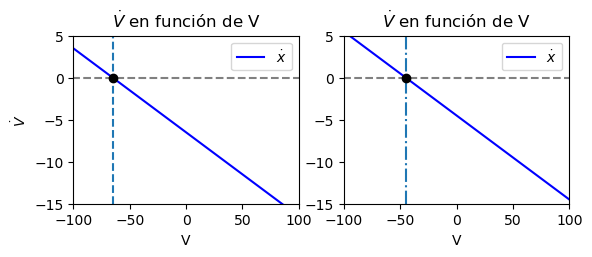

In [6]:
x = np.linspace(-100,100,200)
y = v_prima(x)
plt.subplot(2,2,1)
plt.title("$\dot{V}$ en función de V")
plt.xlabel("V")
plt.ylabel("$\dot{V}$")
plt.plot(x,y,c="blue",label="$\dot{x}$", zorder=0)
plt.scatter(-65,0, c= "Black", zorder = 3)
plt.hlines(0,-150,150, ls="--", color="grey")
plt.xlim(-100,100)
plt.ylim(-15,5)
plt.ylim(-15,5)
plt.vlines(-65,-15,5, ls="--")
plt.legend()
#plt.savefig('v_puntoVSv.png', dpi=300, bbox_inches='tight')
#plt.show()
# Se puede reemplzar los colores por su inicial black -> b

plt.subplot(2,2,2)
x = np.linspace(-100,100,200)
y = v_prima_I(x)
plt.title("$\dot{V}$ en función de V")
plt.xlabel("V")
#plt.ylabel("$\dot{V}$")
plt.plot(x,y,c="blue",
         label="$\dot{x}$",
         zorder=0)
plt.scatter(-45,0, c= "Black", zorder = 3)
plt.hlines(0,-150,150, ls="--", color="grey")
plt.vlines(-45,-15,5, ls="-.")
plt.xlim(-100,100)
plt.ylim(-15,5)
plt.legend()
plt.savefig('v_puntoVSv.png', dpi=300, bbox_inches='tight')
plt.show()
# Se puede reemplzar los colores por su inicial black -> b

In [7]:
def v_prima_I(v):
    return (-45-v)/10

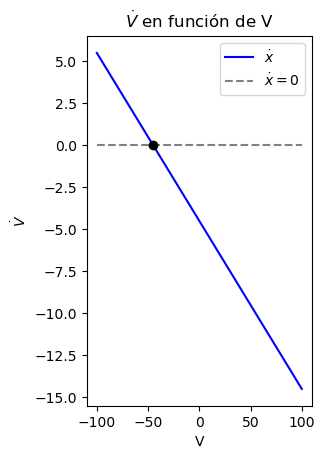

In [8]:
plt.subplot(1,2,2)
x = np.linspace(-100,100,200)
y = v_prima_I(x)
plt.title("$\dot{V}$ en función de V")
plt.xlabel("V")
plt.ylabel("$\dot{V}$")
plt.plot(x,y,c="blue",label="$\dot{x}$", zorder=0)
plt.scatter(-45,0, c= "Black", zorder = 3)
plt.plot(x,np.zeros(200), c="grey", ls="dashed",label=r"$\dot{x}=0$", zorder = 2)
plt.legend()
#plt.savefig('v_puntoVSv.png', dpi=300, bbox_inches='tight')
plt.show()
# Se puede reemplzar los colores por su inicial black -> b

Si analizamos la derivada de la razon de cambio, es decir $\dot{V}$, vemos que es constate con valor $C = -1/10$, vemos que al ser igual para todo punto, es el valor de la derivada en el punto fijo $P_{fijo} = -65 = E_L$. Entonces el punto fijo es un atractor y a tiempo infinito el sistema tiende a estar en ese punto.

## B) Caso $I_e = 2~nA$
Ahora ya no es cero la corriente sino una constante
$$
I_e = 2~ nA
$$
entonces nuestra función es:
$$
\frac{d V_m(t)}{dt} = \frac{1}{\tau_m}(E_L-V_m(t)+R_m I_e(t))
$$
y valuando:
$$
\begin{equation}
\begin{split}
\frac{d V_m(t)}{dt} & = \frac{1}{10}(-65~mV-V_m(t)+10~ M\Omega* 2~nA) \\
\frac{d V_m(t)}{dt} & = \frac{1}{10}(-65~mV-V_m(t)+20~mV) \\
\frac{d V_m(t)}{dt} & = \frac{1}{10}(-45~mV-V_m(t)) 
\end{split}
\end{equation}
$$
Vemos entonces que aplicando una corriente que no varia con el tiempo solo cambiamos el potencial de reposo (Por ley de Ohm) y el planteo sería igual al problema del punto a, con la única diferencia de tener un punto fijo en:
$$
P_{fijo} = -45~mV
$$

## C) Caso $I_e = I$
$I$ es un valor arbitrario (Constante!) y ahora queremos resolver analíticamente la ecuación diferencial:
$$
\frac{d V_m(t)}{dt} = \frac{1}{\tau_m}(E_L-V_m(t)+R_m ~I)
$$
resolvemos:
$$
\begin{equation}
\begin{split}
\frac{d V_m(t)}{dt} & = \frac{1}{\tau_m}(E_L-V_m(t)+R_m ~I) \\
\frac{d V_m(t)}{dt} & = \frac{1}{\tau_m}((E_L+R_m ~I) ~ -V_m(t))\\
\end{split}
\end{equation}
$$
definimos potencial de reposo efectivo:
$$
E_{eff} := E_L+R_m ~I
$$
y seguimos:
$$
\begin{equation}
\begin{split}
\frac{d V_m(t)}{dt} & = \frac{1}{\tau_m}(E_{eff} ~ -V_m(t))\\
\frac{d V_m(t)}{(E_{eff} ~ -V_m(t))} & = \frac{dt}{\tau_m} \\
\end{split}
\end{equation}
$$
Integramos ambos miembros
$$
\begin{equation}
\begin{split}
-\ln{(E_{eff} ~ -V_m(t))} & = \frac{t}{\tau_m} - t_0 \\
E_{eff}-V_m(t) & = \exp{(t_0-t/\tau_m)} \\
V_m(t) & = E_{eff}-\exp{(-t/\tau_m)}~\exp{(t_0)}
\end{split}
\end{equation}
$$
Tomando ahora $\exp{(t_0)} = A$ una constante que podremos despejar con algun dato inicial, tenemos:
$$
V_m(t) =E_{eff} - A~\exp{(t/\tau_m)}
$$
recordamos que $E_{eff} := E_L+R_m ~I$

## D) Graficar solución exacta:
Reemplazando los valores en la solución encontrada tenemos:
$$
V_m(t) =E_{eff} +~A~\exp{(-t/\tau_m)}
$$
$$
E_{eff} := E_L+R_m ~I
$$
Entonces:
$$
E_{eff} = -45~mV
$$
y como $V(0) = -65 mV$
$$
A = -20 mV
$$
$$
V_m(t) = -45 ~mV -20~mV~\exp{(\frac{-t}{10 ~ms})}
$$
Debemos expresar a t en milisegundos.

In [9]:
def V_exacta(t):
    return -45-(20*np.exp(-t/10))

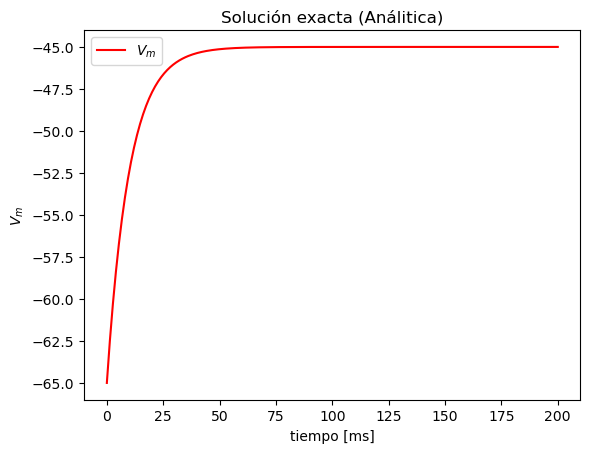

In [10]:
t = np.linspace(0,200,300)
V_e = V_exacta(t)
plt.title("Solución exacta (Análitica)")
plt.xlabel("tiempo [ms]")
plt.ylabel("$V_m$")
plt.plot(t,V_e,c="red",label="$V_m$", zorder=0)
plt.legend()
plt.savefig('SolucionAnalitica.png', dpi=300, bbox_inches='tight')
plt.show()

## E) Resolución con Runge-Kutta

In [11]:
def V_punto(v,t,p):
    return (1/10)*(-45-v)
# V(t=0)= -65
# Intervalo : 0ms < t < 200ms

m=rk4
f=V_punto
x0 = [-65]
ti = 0
tf = 200
k = 4000
p = 0

t_aprox, v_aprox = integrador_ode(m,f,x0,ti,tf,k,p)

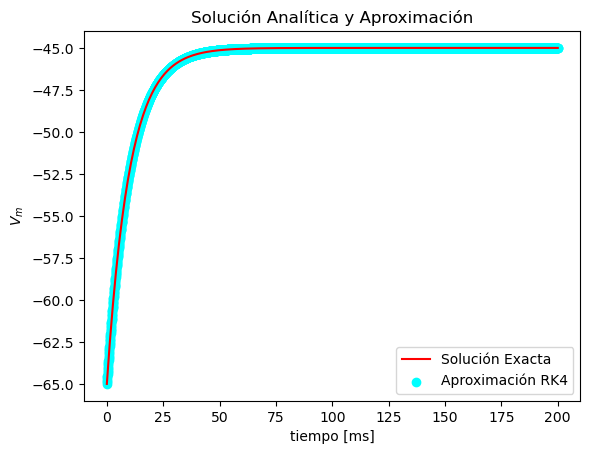

In [12]:
plt.title("Solución Analítica y Aproximación")
plt.xlabel("tiempo [ms]")
plt.ylabel("$V_m$")
plt.plot(t,V_e,c="red",label="Solución Exacta", zorder=1)
plt.scatter(t_aprox,v_aprox, c="cyan", label="Aproximación RK4", zorder=0)
plt.legend()
plt.savefig('Analitica_VS_RK4.png', dpi=300, bbox_inches='tight')
plt.show()

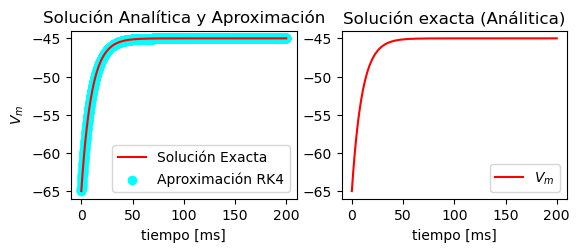

In [13]:

#Sol analitica
plt.subplot(2,2,2)
plt.title("Solución exacta (Análitica)")
plt.xlabel("tiempo [ms]")
plt.ylabel("$V_m$")
plt.plot(t,V_e,c="red",label="$V_m$", zorder=0)
plt.legend()
#plt.savefig('SolucionAnalitica.png', dpi=300, bbox_inches='tight')
#plt.show()

#Analitica y Runge Kutta
plt.subplot(2,2,1)
plt.title("Solución Analítica y Aproximación")
plt.xlabel("tiempo [ms]")
plt.ylabel("$V_m$")
plt.plot(t,V_e,c="red",label="Solución Exacta", zorder=1)
plt.scatter(t_aprox,v_aprox, c="cyan", label="Aproximación RK4", zorder=0)
plt.legend()
plt.savefig('Analitica_VS_RK4_dobleGrafico.png', dpi=300, bbox_inches='tight')
plt.show()

## F) Resolución con mecanismo de disparo

In [14]:
def ODE_Disparo(m,f,x0,a,b,k,p):

    assert k>0
    n = len(x0)
    dt = (b-a)/k
    x = np.zeros((n,k+1))
    t = np.zeros(k+1)
    x[:,0] = x0
    t[0] = a
    lista = []
    for j in range(k):
        t[j+1] = t[j] + dt
        x[:,j+1] = m(f,x[:,j],t[j],dt,p)
        if x[:,j+1] >= (p[0]):
            x[:,j+1] = p[1]
            lista.append(t[j+1])
    return t,x,lista

# De esta forma p = ["Umbral","Valor de reinicio"]
# y lista tiempos nos saca el tiempo para cada disparo

In [15]:
#def V_punto(v,t,p):
#    return (1/10)*(-45-v)
# V(t=0)= -65
# Intervalo : 0ms < t < 200ms

m=rk4
f=V_punto
x0 = [-65]
ti = 0
tf = 200
k = 4000
p = [-50,-65]

t_disparo,v_disparo,lista_tiempos = ODE_Disparo(m,f,x0,ti,tf,k,p)

In [16]:
lista_tiempos

[13.900000000000063,
 27.80000000000026,
 41.69999999999977,
 55.59999999999898,
 69.4999999999982,
 83.3999999999974,
 97.29999999999661,
 111.19999999999582,
 125.09999999999503,
 138.99999999999736,
 152.90000000000052,
 166.80000000000368,
 180.70000000000684,
 194.60000000001]

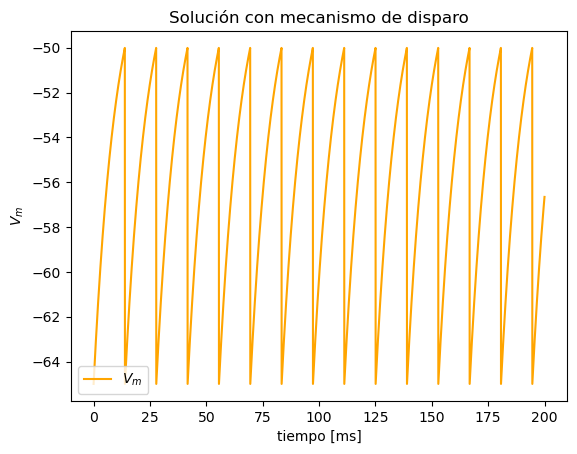

In [17]:
plt.title("Solución con mecanismo de disparo")
plt.xlabel("tiempo [ms]")
plt.ylabel("$V_m$")
plt.plot(t_disparo,v_disparo[0], c="orange",label="$V_m$", zorder=1)
plt.legend()
#plt.savefig('Disparo_I_cte.png', dpi=300, bbox_inches='tight')
plt.show()

## G) Resolucion con mecanismo de disparo y corriente variable
$$
I(t) = I_0 \cos(t/30), ~~~~~ I_0 = 2,5 ~nA
$$


In [18]:
def V_g(v,t,p):
    return (-65-v+10*2.5*np.cos(t/30))/10
m=rk4
#f=V_g
x0 = [-65]
ti = 0
tf = 200
k = 4000
p = [-50,-65]

t_g, v_g, hola = ODE_Disparo(m,V_g,x0,ti,tf,k,p)

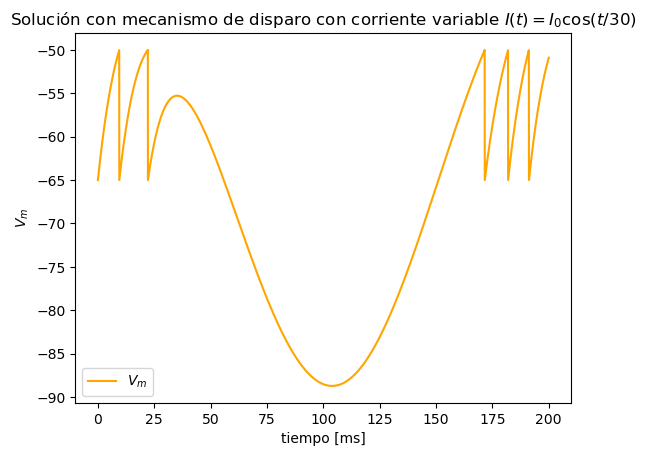

In [19]:
plt.title("Solución con mecanismo de disparo con corriente variable $I(t) = I_0 \cos(t/30)$")
plt.xlabel("tiempo [ms]")
plt.ylabel("$V_m$")
plt.plot(t_g,v_g[0], c="orange",label="$V_m$", zorder=1)
plt.legend()
plt.savefig('Disparo_Icos.png', dpi=300, bbox_inches='tight')
plt.show()

## I) Resolución con disparo y corriente variable:

In [20]:
def I(t):
    return (0.35)*((np.cos(t/3.0)+np.sin(t/5.0)+np.cos(t/7.0)+np.sin(t/11.0)+np.cos(t/13.0))**2)

In [21]:
def V_i(v,t,p):
    return (-65-v+10*I(t))/10
m=rk4
#f=V_g
x0 = [-65]
ti = 0
tf = 200
k = 4000
p = [-50,-65]

t_i, v_i, hola2 = ODE_Disparo(m,V_i,x0,ti,tf,k,p)
hola2

[6.0499999999999865,
 79.14999999999765,
 96.34999999999667,
 118.29999999999542,
 122.2999999999952,
 168.6500000000041]

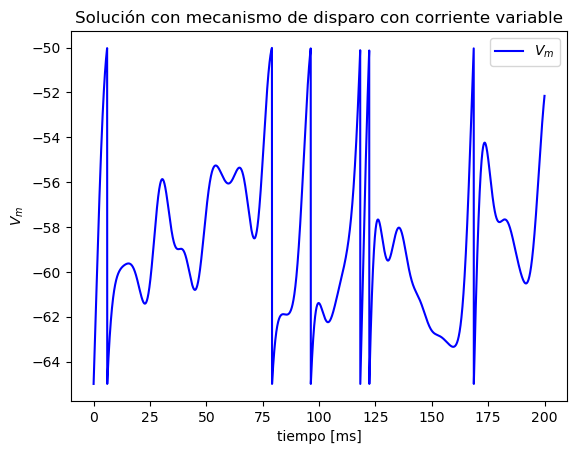

In [22]:
plt.title("Solución con mecanismo de disparo con corriente variable")
plt.xlabel("tiempo [ms]")
plt.ylabel("$V_m$")
plt.plot(t_i,v_i[0], c="blue",label="$V_m$", zorder=1)
plt.legend()
plt.savefig('Disparo_Icossincossin.png', dpi=300, bbox_inches='tight')
plt.show()

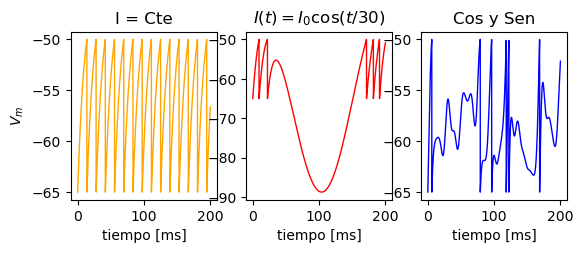

In [23]:
# Primer mecanismo de disparo
plt.subplot(2,3,1)
plt.title("I = Cte")
plt.xlabel("tiempo [ms]")
plt.ylabel("$V_m$")
plt.plot(t_disparo,v_disparo[0], c="orange",label="$V_m$", zorder=1, lw=1)
#plt.legend(bbox_to_anchor=(0.5, 0.0))

#Con coseno
plt.subplot(2,3,2)
plt.title("$I(t) = I_0 \cos(t/30)$")
plt.xlabel("tiempo [ms]")
#plt.ylabel("$V_m$")
plt.plot(t_g,v_g[0], c="red",label="$V_m$", zorder=1, lw=1)
#plt.legend()

#Cosenos y Senos
plt.subplot(2,3,3)
plt.title("Cos y Sen")
plt.xlabel("tiempo [ms]")
#plt.ylabel("$V_m$")
plt.plot(t_i,v_i[0], c="blue",label="$V_m$", zorder=1, lw=1)
#plt.legend(loc = 'lower left',bbox_to_anchor=(0.78, 0.15))

plt.savefig('Distintos_Disparos.png', dpi=300, bbox_inches='tight')
plt.show()

## H) Me genera duda

$$
\frac{d V_m(t)}{dt} = \frac{1}{\tau_m}(E_L-V_m(t)+R_m I_e(t))
$$
Escribimos esto pero en funcion de la corriente

Si despejamos la solución exacta para $I=Cte$:
$$
V_m(t) = E_{L}+RI-A\exp{(-t/\tau_m)}~
$$
y tomamos el dato $V(0) = E_L$, obtenemos $A=RI$
entonces:
$$
V_m(t) = E_{L}+RI-RI\exp{(-t/\tau_m)}~
$$

In [24]:
def frecuencia(I):
    return -1/((np.log(1-(1.5/I)))*10)

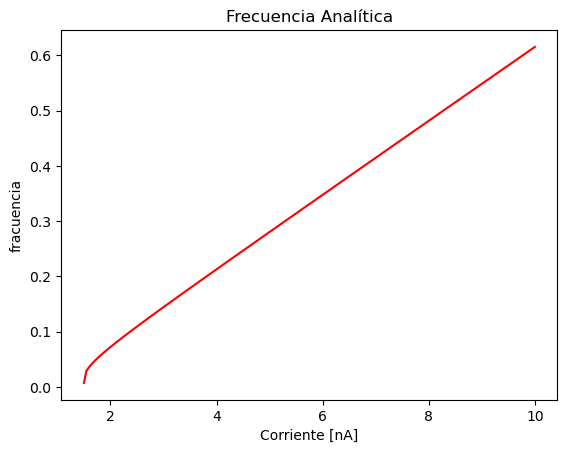

In [25]:
I = np.linspace(1.500001,10,200)
f = np.vectorize(frecuencia)(I)
plt.title("Frecuencia Analítica")
plt.xlabel("Corriente [nA]")
plt.ylabel("fracuencia")
plt.plot(I,f,c="red",
         #label="$V_m$",
         zorder=0)
#plt.legend()
plt.show()

$$
\frac{d V_m(t)}{dt} = \frac{1}{\tau_m}(E_L-V_m(t)+R_m I_e(t))
$$

In [26]:
def analitica_I(V,t,p):
    return (-65-V+10*I)/10
x0 = [-65]
ti = 0
tf = 200
p = [-50,-65]
k = 4000
frec = []
corr = []
for i in range(18):
    I = 1.500001 + i*0.5
    t_dis, v_dis, tiempos = ODE_Disparo(rk4,analitica_I,x0,ti,tf,k,p)
    frec.append(1/(tiempos[0]))
    corr.append(I)

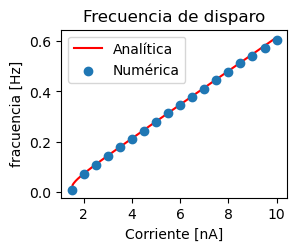

In [27]:
I = np.linspace(1.500001,10,200)
f = np.vectorize(frecuencia)(I)
plt.subplot(2,2,1)
plt.title("Frecuencia de disparo")
plt.xlabel("Corriente [nA]")
plt.ylabel("fracuencia [Hz]")
plt.plot(I,f,c="red",
         label="Analítica",
         zorder=0)
plt.scatter(corr,frec, label= "Numérica")
plt.legend()
plt.savefig('Punto_H.png', dpi=300, bbox_inches='tight')
plt.show()